## Analyse Exploratoire

### Univariate and Bivariate analysis

In [30]:

# Import libraries
import pandas as pd
import time
import os
import inspect
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import numpy as np
import collections

import seaborn as sns
from scipy.spatial import distance
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:

# Import dataset. 
t1 = time.time()
df = pd.read_csv('D:/stuffs/Online_courses/openclassrooms/Projet2/data/dataset_final.csv', header = 0 )
t2 = time.time()

print(f'It took {t2-t1} sec to import the dataset')


col_list = ['product_name', 'pnns_groups_1',# 'categories', 'brands',  # Info products
            'countries', # Location
            #'packaging',# Composition packaging
            'nutriscore_score', 'nutriscore_grade', 'nova_group', # nutriscore
            'energy-kcal_100g', 'proteins_100g', 'carbohydrates_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', 'fiber_100g', 'salt_100g' #, # Info composition
            #'ecoscore_score', 'ecoscore_grade', # environmental impact
            #'image_url', 'image_ingredients_url', 'image_nutrition_url' # Images
            ]

col_dict ={'info_product' : ['product_name', 'pnns_groups_1'],#, 'categories', 'brands'], # Info products
            'location': ['countries'], # Location
            #'package' : ['packaging'], # Composition packaging
            'nutriscore' : ['nutriscore_score', 'nutriscore_grade', 'nova_group'], # nutriscore
            'nutrient' : ['energy-kcal_100g', 'proteins_100g', 'carbohydrates_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', 'fiber_100g', 'salt_100g']#, # Info composition
            #'impact' : ['ecoscore_score', 'ecoscore_grade'], # environmental impact
            #'image' : ['image_url', 'image_ingredients_url', 'image_nutrition_url'] # Images
            }

It took 1.8574104309082031 sec to import the dataset


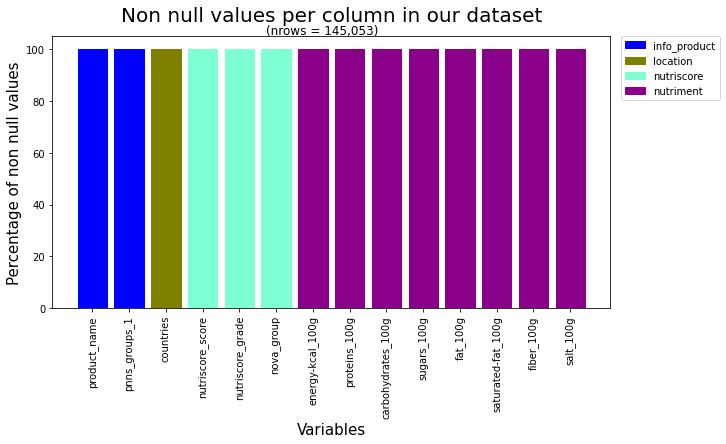

In [7]:
# =============================================================================
# We draw our graph with our latest dataset
# =============================================================================

available_values = df[col_list].notnull().sum(axis=0)

plt.figure(figsize = (10,5))
plt.ticklabel_format(style='sci')

# Use percentage in the y axis instead of plain values
bars = plt.bar(col_list, available_values/len(df)*100)
plt.title('Non null values per column in our dataset',
          fontsize = 20, pad = 15)
plt.suptitle(f'(nrows = {len(df):,d})', x = 0.5, y = 0.915)
plt.ylabel('Percentage of non null values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.xticks(rotation=90)
# plt.ylim(0,100)


# Change color of bars depending on their category
for n, bar in enumerate(bars):
    if col_list[n] in col_dict['info_product']:
        bar.set_color('blue')
        patch1 = mpatches.Patch(color='blue', label='info_product')
        
    if col_list[n] in col_dict['location']:
        bar.set_color('olive')    
        patch2 = mpatches.Patch(color='olive', label='location')
        
    # if col_list[n] in col_dict['package']:
    #     bar.set_color('goldenrod')
    #     patch3 = mpatches.Patch(color='goldenrod', label='package')
        
    # if col_list[n] in col_dict['allergens']:
    #     bar.set_color('slategrey')
    #     patch4 = mpatches.Patch(color='slategrey', label='allergens')
        
    if col_list[n] in col_dict['nutriscore']:
        bar.set_color('aquamarine')
        patch5 = mpatches.Patch(color='aquamarine', label='nutriscore')
        
    if col_list[n] in col_dict['nutrient']:
        bar.set_color('darkmagenta')    
        patch6 = mpatches.Patch(color='darkmagenta', label='nutriment')
        
    # if col_list[n] in col_dict['impact']:
    #     bar.set_color('firebrick')    
    #     patch7 = mpatches.Patch(color='firebrick', label='impact')
        
    # if col_list[n] in col_dict['image']:
    #     bar.set_color('yellowgreen')    
    #     patch8 = mpatches.Patch(color='yellowgreen', label='image')

plt.legend(handles=[patch1, patch2,# patch3, #patch4, 
                    patch5, patch6#, patch7, patch8
                    ], 
           # loc = "upper center")
            bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('D:/stuffs/Online_courses/openclassrooms/Projet2/figures/final_non_null.png', bbox_inches='tight')

plt.show()

       energy-kcal_100g  proteins_100g  carbohydrates_100g    sugars_100g  \
count     145053.000000  145053.000000       145053.000000  145053.000000   
mean         258.533567       9.523301           23.097798      11.292685   
std          171.291973       8.514604           25.952022      18.073728   
min            0.000000       0.000000            0.000000       0.000000   
25%          117.000000       2.800000            1.600000       0.500000   
50%          240.000000       7.000000           11.000000       2.500000   
75%          376.000000      15.000000           44.300000      13.600000   
max          900.000000      72.000000          100.000000     100.000000   

            fat_100g  saturated-fat_100g     fiber_100g      salt_100g  \
count  145053.000000       145053.000000  145053.000000  145053.000000   
mean       13.806840            5.643675       1.643005       1.156481   
std        15.485479            7.608945       2.499379       3.011780   
min       

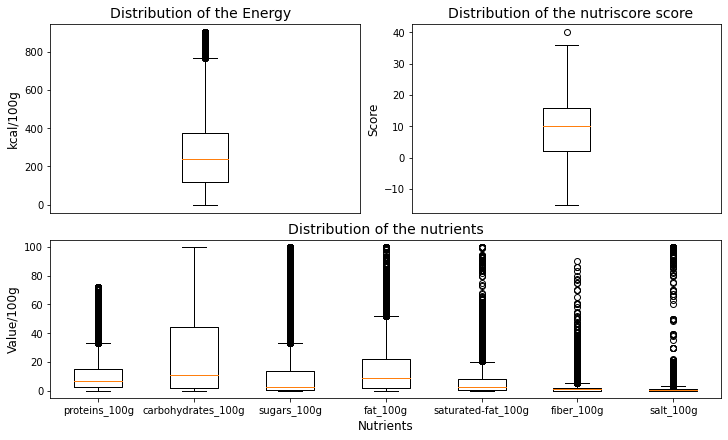

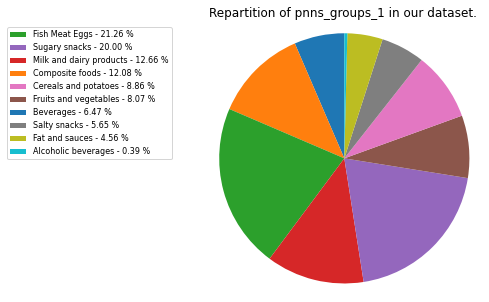

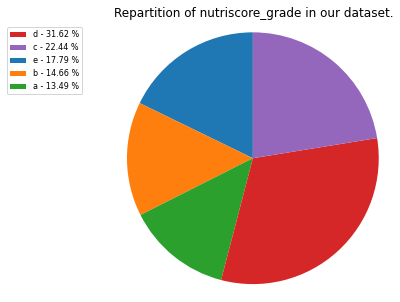

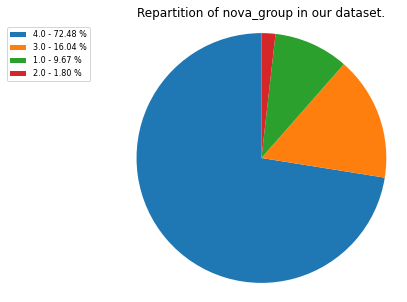

In [9]:
# =============================================================================
# Univariate analysis
# Dealing with numerical variables
# =============================================================================

# Describe variables
######!!!!!! PROBLEM HERE WITH SALT !!!!!!######
pd.set_option('max_columns', None)
num_val = df[col_dict['nutrient']].join(df['nutriscore_score'])
descri_num = num_val.describe()
print(descri_num)
pd.reset_option('max_columns')


# Draw boxplots
# Create figure
fig = plt.figure(figsize = (10,6), constrained_layout=True)

# Create grid with 2 rows and 1 columns
gs0 = gridspec.GridSpec(2, 1, figure=fig)

# In the first row, display 2 graphs
gs1 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[0])

# Draw first graph of first row
ax = fig.add_subplot(gs1[0])
ax.boxplot(df['energy-kcal_100g'])
ax.set_ylabel('Energy', fontsize=12)
ax.set_xticks([0])
ax.set_ylabel('kcal/100g', fontsize=12)
ax.set_title('Distribution of the Energy  ', fontsize=14)

# Draw second graph of first row
ax = fig.add_subplot(gs1[1])
ax.boxplot(df['nutriscore_score'])
ax.set_xticks([0])
ax.set_ylabel('Score', fontsize=12)
ax.set_title('  Distribution of the nutriscore score', fontsize=14)


bottom_var = ['proteins_100g', 'carbohydrates_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', 'fiber_100g', 'salt_100g']

# In the first row, display 1 graph
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[1])
ax = fig.add_subplot(gs2[0])
ax.boxplot(df[bottom_var])
ax.set_xlabel('Nutrients', fontsize=12)
ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xticklabels(bottom_var)

ax.set_ylabel('Value/100g', fontsize=12)
ax.set_title('Distribution of the nutrients', fontsize=14)

plt.savefig('D:/stuffs/Online_courses/openclassrooms/Projet2/figures/univariate_num.png', bbox_inches='tight')

plt.show()

#%%

# =============================================================================
# Univariate analysis
# Dealing with categorical variables
# =============================================================================

variables = ['pnns_groups_1', 'nutriscore_grade', 'nova_group']

for variable in variables:
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    label_name = df[variable].unique()
    sizes = []
    prct_size = []
    
    for n, label in enumerate(label_name):
        size = (df[variable] == label).sum()
        sizes.append(size)
    
    for size in sizes:
        prct_size.append(100*size/np.sum(sizes))
    
    # prct_size = 100.*sizes/np.sum(sizes)
    
    
    plt.figure(figsize = (5,5))
    
    patches, texts = plt.pie(sizes, startangle=90, radius=1.2)
    
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(label_name, prct_size)]
    
    
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                              key=lambda label_name: label_name[2],
                                              reverse=True))
    
    plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
    
    plt.title(f'Repartition of {variable} in our dataset.')
    plt.savefig('D:/stuffs/Online_courses/openclassrooms/Projet2/figures/univariate_cat_{variable}.png', bbox_inches='tight')
    plt.show()
    

No handles with labels found to put in legend.


<Figure size 2880x2880 with 0 Axes>

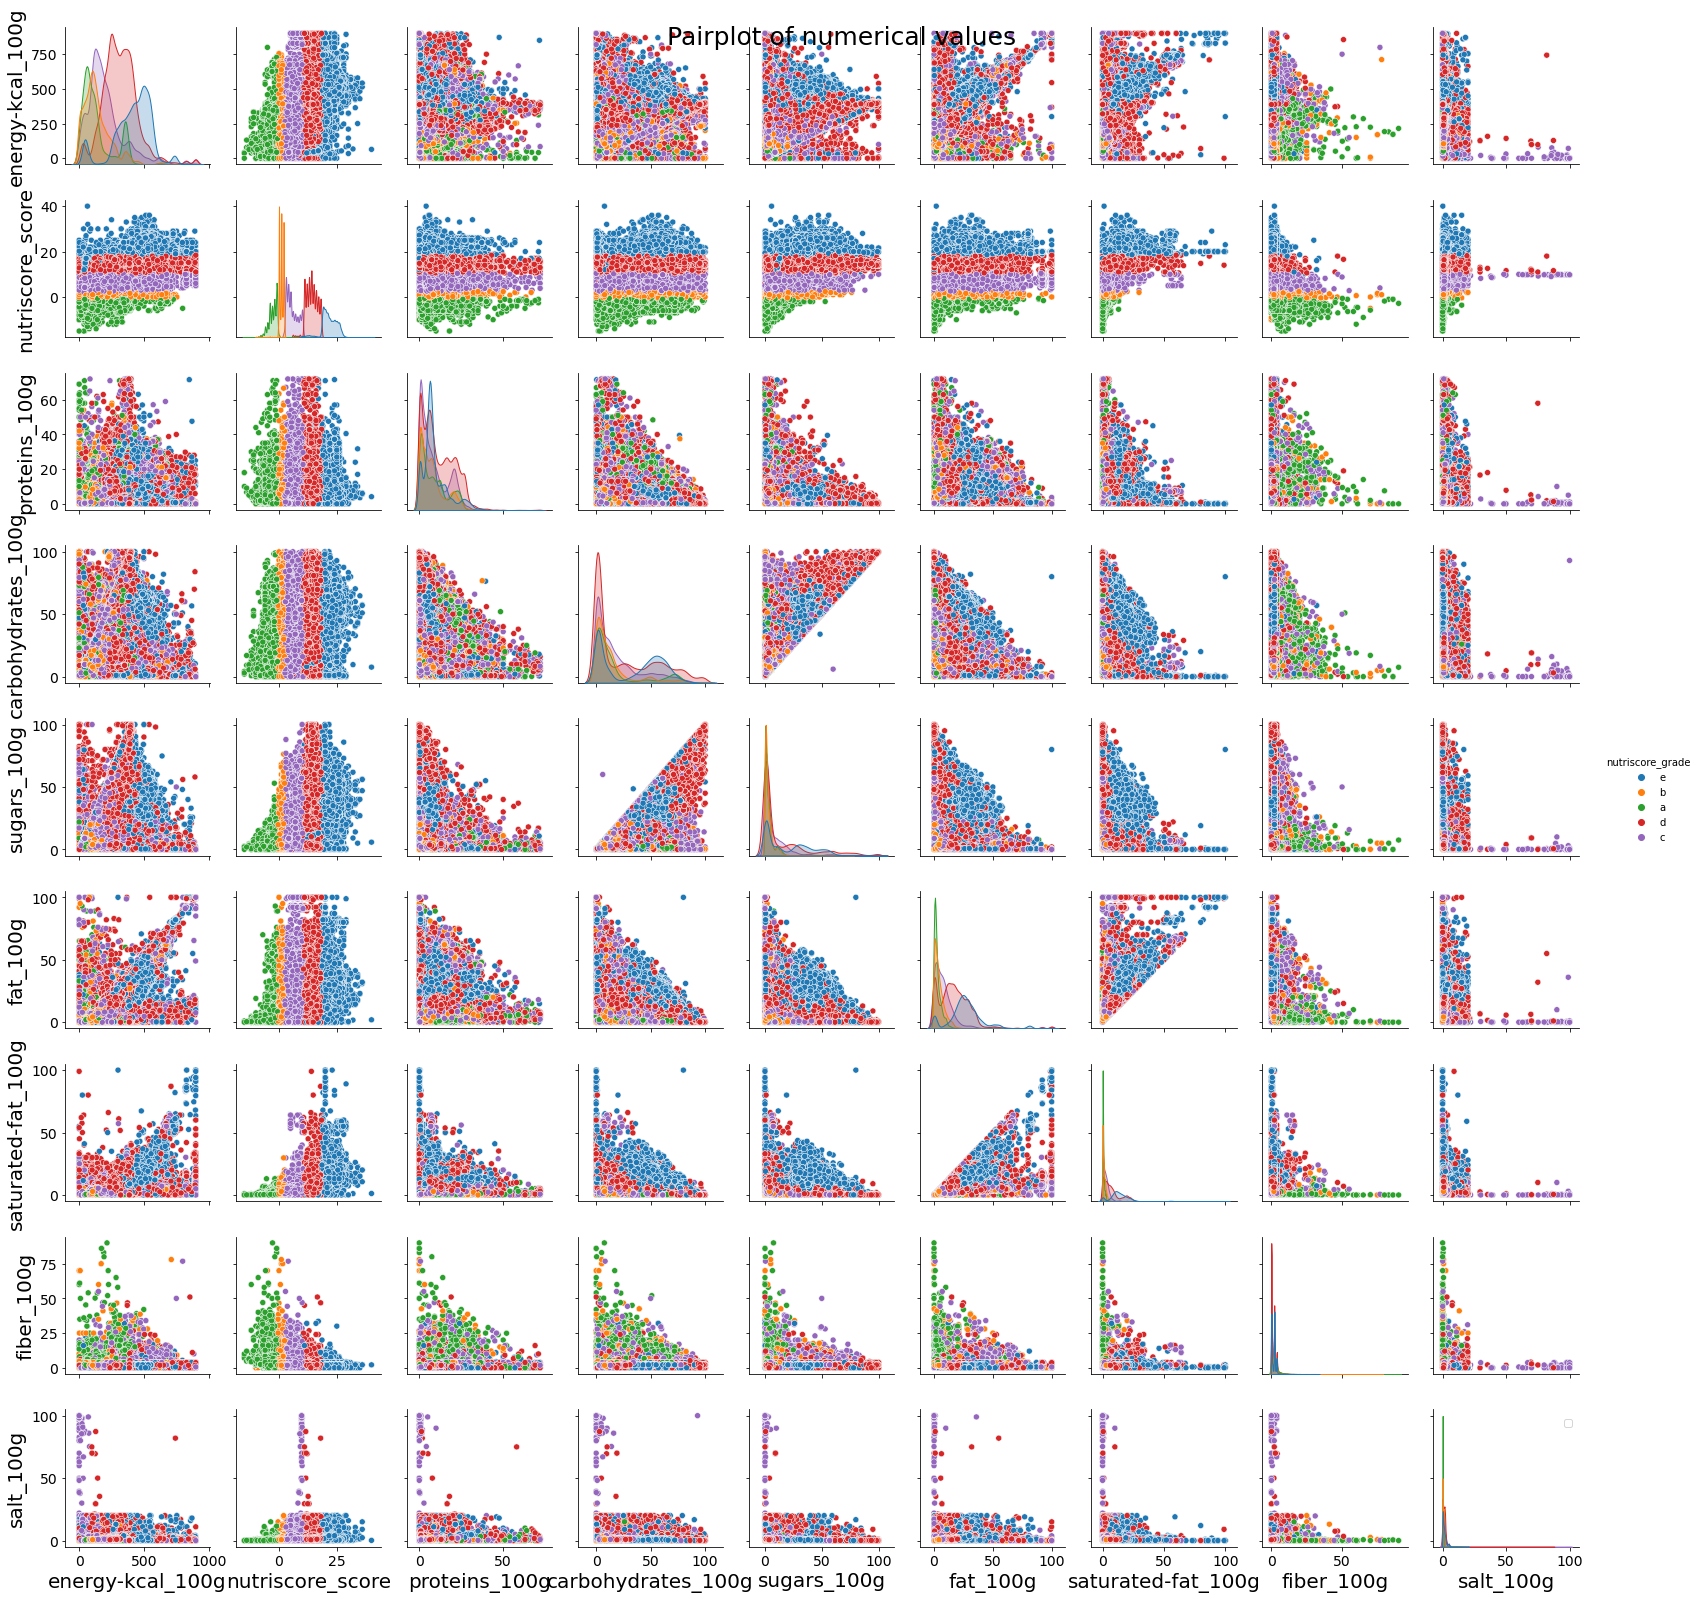

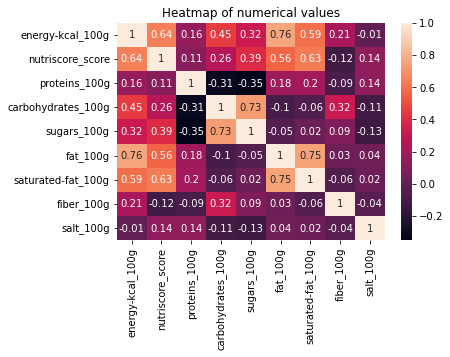

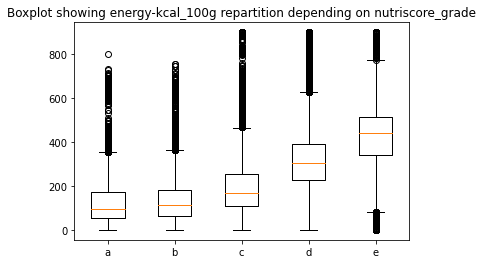

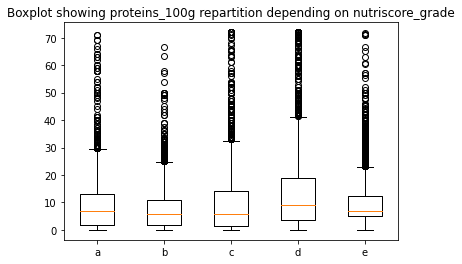

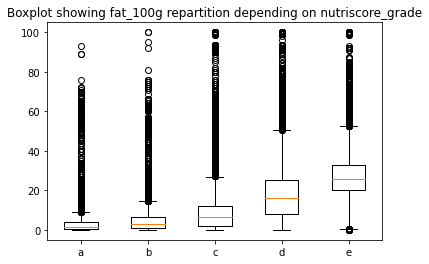

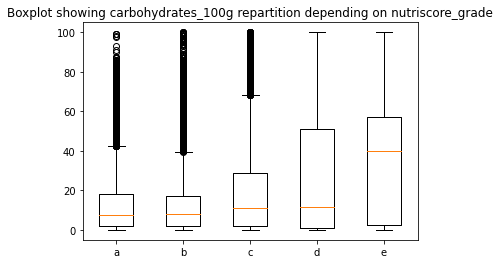

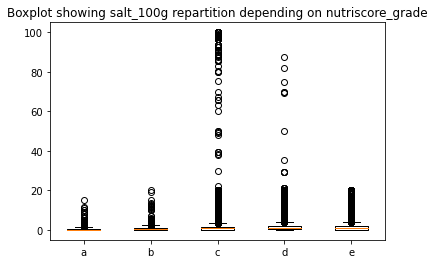

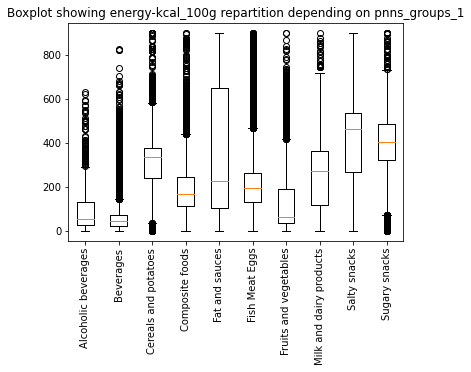

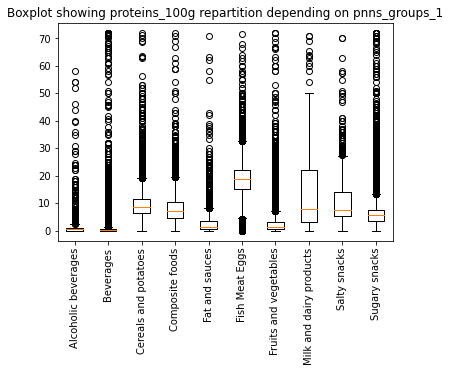

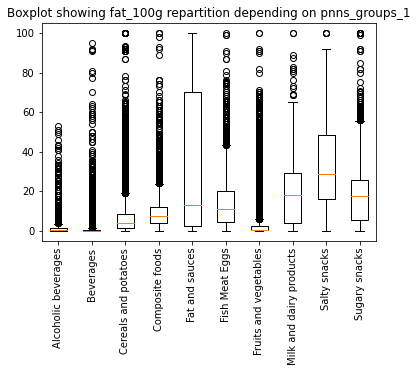

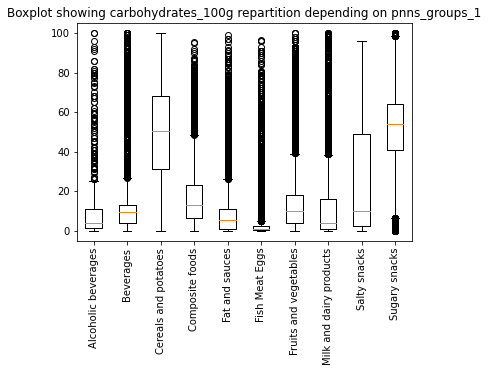

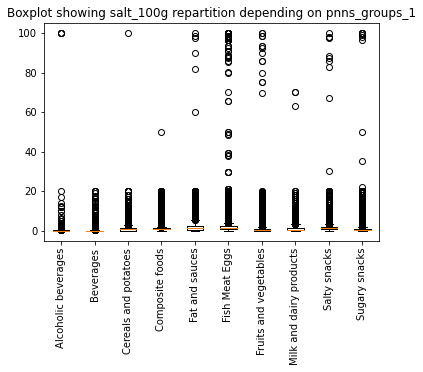

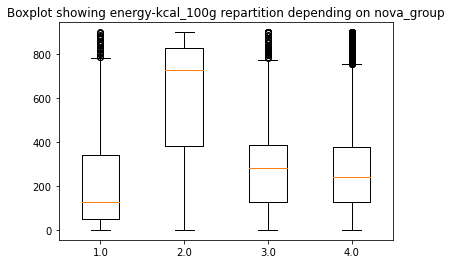

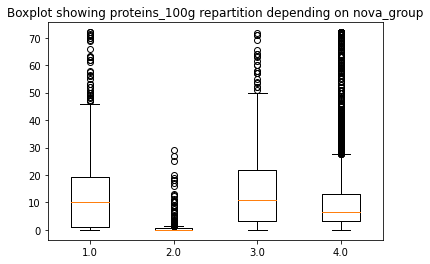

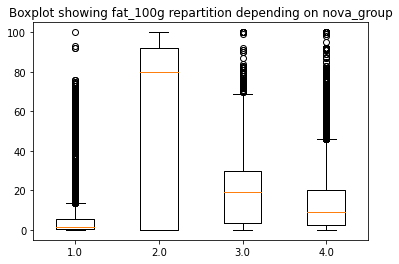

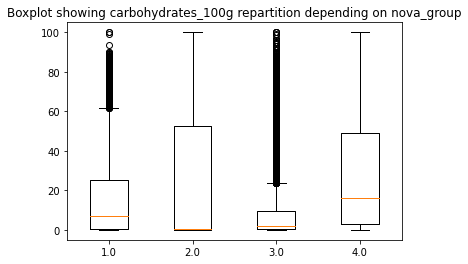

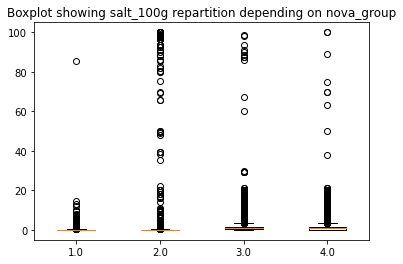

In [11]:
# =============================================================================
# Bivariate analysis
# Dealing with numerical variables
# =============================================================================

import seaborn as sns


num_var = ['energy-kcal_100g', 'nutriscore_score', 'proteins_100g', 'carbohydrates_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', 'fiber_100g', 'salt_100g']

# Plot pairplot
# Add colors for nutriscore.
with sns.plotting_context(rc={'axes.labelsize':20,
                              'xtick.labelsize': 14,
                              'ytick.labelsize': 14}):
    plt.figure(figsize = (40,40))
    sns.pairplot(df, vars = num_var, hue = 'nutriscore_grade',
                  #diag_kind = 'hist', diag_kws = {'bins': 10}
                 )
    plt.suptitle('Pairplot of numerical values', fontsize = 25)
    plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=1)

    plt.savefig('D:/stuffs/Online_courses/openclassrooms/Projet2/figures/bivariate_num_pairplot.png', bbox_inches='tight')
    plt.show()


# Plot heatmap
plt.figure()
sns.heatmap(df[num_var].corr().round(2), annot=True)
plt.title('Heatmap of numerical values')
plt.savefig('D:/stuffs/Online_courses/openclassrooms/Projet2/figures/bivariate_num_heatmap.png', bbox_inches='tight')
plt.show()



# Dealing with categorical & numerical variables

for cat in ['nutriscore_grade', 'pnns_groups_1', 'nova_group']:
    
    for num in ['energy-kcal_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g']:
        data =  {}
        for n, m in enumerate(df[cat].unique()):
            data[m] = df[num][df[cat] == m]
        
        plt.figure()
        data = collections.OrderedDict(sorted(data.items()))
        plt.boxplot(data.values(), labels = data.keys())
        if 'pnns' in cat:
            plt.xticks(rotation = 90)
        plt.title(f'Boxplot showing {num} repartition depending on {cat}')
        plt.savefig('D:/stuffs/Online_courses/openclassrooms/Projet2/figures/bivariate/boxplot_{cat} by {num}.png', bbox_inches='tight')
        plt.show()
    
        

## Multivariate analysis

In [12]:
# reshape the dataframe suitable for statsmodels package 
df_melt = pd.melt(df, id_vars=['nutriscore_grade'], 
                 value_vars=['fat_100g'],
                 var_name='fat')

print(df_melt.head())

  nutriscore_grade       fat  value
0                e  fat_100g  15.22
1                b  fat_100g  10.90
2                a  fat_100g   0.50
3                e  fat_100g  13.00
4                a  fat_100g   5.00


Text(0.5, 1.0, 'Distribution of fat depending on their categories')

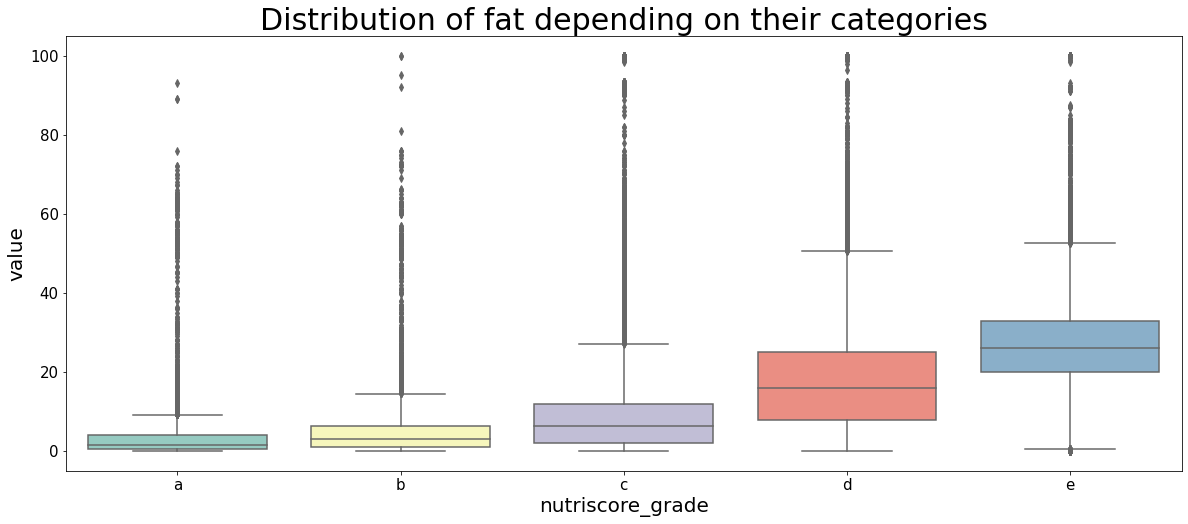

In [13]:
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups

#set font of all elements to size 15
plt.rc('font', size=15) 
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=30) 

plt.figure(figsize = (20,8))
sns.boxplot(x="nutriscore_grade", y="value",# hue="nutriscore_grade",
            data=df_melt, palette="Set3",
            order=['a', 'b', 'c', 'd', 'e']) 
plt.title("Distribution of fat depending on their categories")


We compute an ANOVA

In [22]:
from bioinfokit.analys import stat
stat_aov = stat()
stat_aov.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(nutriscore_grade)')

pd.set_option('max_columns', None)
print(stat_aov.anova_summary)

# Output:
#                            df        sum_sq       mean_sq             F   PR(>F) 
# C(nutriscore_grade)       4.0  9.571735e+06  2.392934e+06  13767.007435      0.0   
# Residual             145048.0  2.521174e+07  1.738165e+02           NaN      NaN 

print("""
According to this result with a p<0.005, we can reject the Null hypothesis
that states that there is no difference amongst nutriscore grades regarding 
the amount of fat with a confidence level of 99.5%.
""")

                           df        sum_sq       mean_sq             F  \
C(nutriscore_grade)       4.0  9.571735e+06  2.392934e+06  13767.007435   
Residual             145048.0  2.521174e+07  1.738165e+02           NaN   

                     PR(>F)  
C(nutriscore_grade)     0.0  
Residual                NaN  

According to this result with a p<0.005, we can reject the Null hypothesis
that states that there is no difference amongst nutriscore grades regarding 
the amount of fat with a confidence level of 99.5%.



In [23]:
# Now, we check for which pair there is a statistical difference.
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
stat_hsd = stat()
stat_hsd.tukey_hsd(df=df_melt, res_var='value', xfac_var='nutriscore_grade', anova_model='value ~ C(nutriscore_grade)')
print(stat_hsd.tukey_summary)


# Output:
#   group1 group2       Diff      Lower      Upper     q-value  p-value
# 0      e      b  22.347032  22.013937  22.680126  258.807703    0.001
# 1      e      a  23.931466  23.590579  24.272352  270.822567    0.001
# 2      e      d   9.681803   9.401935   9.961672  133.452836    0.001
# 3      e      c  17.042459  16.742681  17.342237  219.309657    0.001
# 4      b      a   1.584434   1.228208   1.940660   17.158278    0.001
# 5      b      d  12.665228  12.366866  12.963590  163.755181    0.001
# 6      b      c   5.304573   4.987460   5.621685   64.530094    0.001
# 7      a      d  14.249662  13.942626  14.556699  179.036025    0.001
# 8      a      c   6.889007   6.563720   7.214294   81.698669    0.001
# 9      d      c   7.360655   7.100013   7.621298  108.942347    0.001

print("""
According to those result with a p<0.005, we can reject the Null hypothesis
that states that there is no difference amongst each pair regarding the 
amount of fat for each nutriscore grades with a confidence level of 99.5%.

""")

C:\Users\lepas\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


  group1 group2       Diff      Lower      Upper     q-value  p-value
0      e      b  22.347032  22.013937  22.680126  258.807703    0.001
1      e      a  23.931466  23.590579  24.272352  270.822567    0.001
2      e      d   9.681803   9.401935   9.961672  133.452836    0.001
3      e      c  17.042459  16.742681  17.342237  219.309657    0.001
4      b      a   1.584434   1.228208   1.940660   17.158278    0.001
5      b      d  12.665228  12.366866  12.963590  163.755181    0.001
6      b      c   5.304573   4.987460   5.621685   64.530094    0.001
7      a      d  14.249662  13.942626  14.556699  179.036025    0.001
8      a      c   6.889007   6.563720   7.214294   81.698669    0.001
9      d      c   7.360655   7.100013   7.621298  108.942347    0.001

According to those result with a p<0.005, we can reject the Null hypothesis
that states that there is no difference amongst each pair regarding the 
amount of fat for each nutriscore grades with a confidence level of 99.5%.




### PCA

       energy-kcal_100g  proteins_100g  carbohydrates_100g    sugars_100g  \
count     145053.000000  145053.000000       145053.000000  145053.000000   
mean         258.533567       9.523301           23.097798      11.292685   
std          171.291973       8.514604           25.952022      18.073728   
min            0.000000       0.000000            0.000000       0.000000   
25%          117.000000       2.800000            1.600000       0.500000   
50%          240.000000       7.000000           11.000000       2.500000   
75%          376.000000      15.000000           44.300000      13.600000   
max          900.000000      72.000000          100.000000     100.000000   

            fat_100g  saturated-fat_100g     fiber_100g      salt_100g  \
count  145053.000000       145053.000000  145053.000000  145053.000000   
mean       13.806840            5.643675       1.643005       1.156481   
std        15.485479            7.608945       2.499379       3.011780   
min       

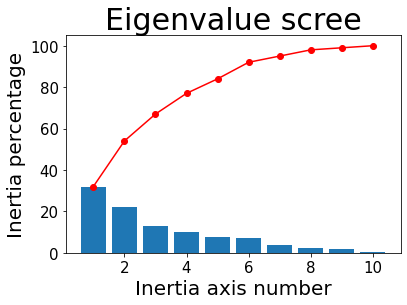


      From this graph, we can see that 50% of the inertia is explained with 
      2 axis. Moreover, 75% of it is explained with 4 axis and 100% with
      10 axis.
      Finally, 60% is explained with 3.
      


In [19]:

# =============================================================================
# Applying PCA to our quantitative data
# =============================================================================


# Define df with quantitative data : 
df_pca = df[col_dict['nutrient']].join(df[['nutriscore_score', 'nova_group']]).copy()
df_pca.index = df['product_name']

# On applique la methode .describe() pour avoir la moyenne et la .std(),
# et la méthode .round(2) pour arrondir à 2 décimales après la virgule : 
print(df_pca.describe())

# Create scaler : 
scaler = StandardScaler()

# Fit and train scaler 
df_pca_scaled = scaler.fit_transform(df_pca)

# # On le transforme en DataFrame : 
df_pca_scaled = pd.DataFrame(df_pca_scaled)

# Save names and features for 
names = df_pca.index
features = df_pca.columns

# Define nb of components to use in PCA 
# (must be between 0 and min(n_samples, n_features)=11)
n_components = len(features)

# Create PCA
pca = PCA(n_components=n_components)

# Train on scaled data
pca.fit(df_pca_scaled)


# Compute the explained variance ration and its cumulative sum.
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()

x_list = range(1, len(scree)+1)
# Draw graph of cumulative sums
plt.figure()
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Inertia axis number")
plt.ylabel("Inertia percentage")
plt.title("Eigenvalue scree")
plt.savefig('D:/stuffs/Online_courses/openclassrooms/Projet2/figures/pca/eigenvalue_scree.png', bbox_inches='tight')
plt.show()


p50, p60, p75, p100 = 0, 0, 0, 0
for n, x in enumerate(scree_cum):
    n += 1
    if x >= 50 and p50 == 0:
        p50 = n
    elif x >= 60 and p60 == 0:
        p60 = n
    elif x >= 75 and p75 == 0:
        p75 = n
    elif x >= 100 and p100 == 0:
        p100 = n



print(f"""
      From this graph, we can see that 50% of the inertia is explained with 
      {p50} axis. Moreover, 75% of it is explained with {p75} axis and 100% with
      {p100} axis.
      Finally, 60% is explained with {p60}.
      """)

     energy-kcal_100g  proteins_100g  carbohydrates_100g  sugars_100g  \
F1           0.510119       0.068505            0.207960     0.224022   
F2           0.029699      -0.419669            0.556264     0.521872   
F3           0.212222       0.048873            0.077046    -0.133061   
F4           0.068599       0.240004            0.151892    -0.045744   
F5           0.035781       0.338054           -0.045952    -0.224928   
F6          -0.101531      -0.772599           -0.246943    -0.247988   
F7          -0.483860       0.104950           -0.251824     0.323713   
F8           0.004110       0.032013           -0.540153     0.449346   
F9           0.011563       0.131893           -0.092404     0.486129   
F10         -0.665802       0.136274            0.437612    -0.050516   

     fat_100g  saturated-fat_100g  fiber_100g  salt_100g  nutriscore_score  \
F1   0.449533            0.439167    0.049358   0.021235          0.481789   
F2  -0.277733           -0.258561    0.2

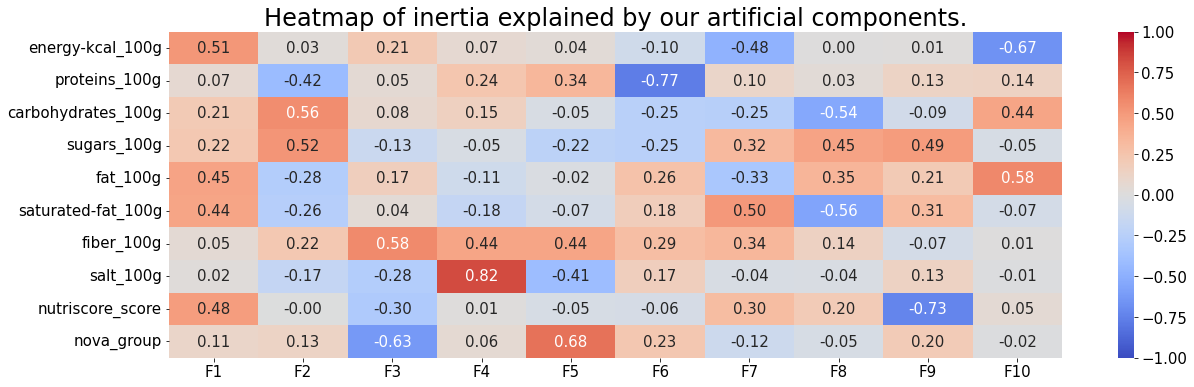

In [20]:

# =============================================================================
# Draw heatmap
# =============================================================================


# Work on our components
pcs = pd.DataFrame(pca.components_, 
                   columns = features,
                   index = [f"F{i}" for i in x_list])
print(pcs)

# Draw heatmap
plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title('Heatmap of inertia explained by our artificial components.'
          , fontsize = 24)
plt.savefig('D:/stuffs/Online_courses/openclassrooms/Projet2/figures/pca/heatmap.png', bbox_inches='tight')
plt.show()


In [32]:
# =============================================================================
# Draw correlation graph
# =============================================================================
from adjustText  import adjust_text

# Create functions:
    
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    fig, ax = plt.subplots(figsize=(10, 9))
    
    for i in range(0, pca.components_.shape[1]):
        
        if pca.components_[x, i] > 0:
            m = 0.05
        else: m = -0.1
        
        if pca.components_[y, i] > 0:
            n = 0.08  #+ random.randrange(2,4) / 100 * random.choice((-1,1))
        else: n = -0.1 #+ random.randrange(2,8) / 100 
        
        ax.arrow(0,
                 0,  # Start the arrow at the origin
                 pca.components_[x, i],  #0 for PC1
                 pca.components_[y, i],  #1 for PC2
                 head_width=0.07,
                 head_length=0.07, 
                 width=0.02)
    
        plt.text(pca.components_[x, i] + m,
                 pca.components_[y, i] + n,
                 features[i])
        
        
        
        
    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    
    
    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    
    plt.title("Correlation circle (F{} and F{})".format(x+1, y+1),
              fontsize = 20)
    
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.savefig('D:/stuffs/Online_courses/openclassrooms/Projet2/figures/pca/correlation_circle_F{x+1}_F{y+1}.png', bbox_inches='tight')
    plt.show(block=False)
    

   

def closest_nodes(nodes, threshold = 1):
    """
    For all points in a list or array, compute the index of the closest point 
    of the list and the distance to it.
        nodes: (list or array)
            List of point. Preferably an array (faster).
        threshold: (int)
            Minimum distance value over hich we want to return the index.
    
    Return:
        node_index:
            list of index of the points that are over the threshold
    """
    
    
    node_index = []
    
    for index, point in enumerate(tqdm(nodes)):
        
        # Remove the dot we are looking at from the list that we will use.
        new_nodes = np.concatenate((nodes[:index], nodes[index+1:]))
        
        # Compute the minimum distance 
        closest_distance = np.amin(distance.cdist([point], new_nodes))
        
        # Check if we passed the threshold
        if closest_distance > threshold:
            node_index.append(index)
    
    
    return node_index


    

def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker=".",
                                threshold = 1):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    threshold : Used to compute the closest_nodes
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        texts = []
        counter = 0
        
        # Add labels
        a = X_[:, x]
        b = X_[:, y]
        a_b = np.array(list(zip(a, b)))
        nodes_index = closest_nodes(a_b, threshold = threshold)
        for i in nodes_index:
            # Get position of the point
            _x, _y = X_[i,[x,y]]
            # Add label
            texts.append(plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center'))
    
        adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
    
    # Titre et display
    plt.title(f"Projection of individuals (on F{x+1} and F{y+1})",
              fontsize = 20)
    plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=1)

    plt.savefig('D:/stuffs/Online_courses/openclassrooms/Projet2/figures/pca/projection_F{x+1}_F{y+1}.png', bbox_inches='tight')
    plt.show()

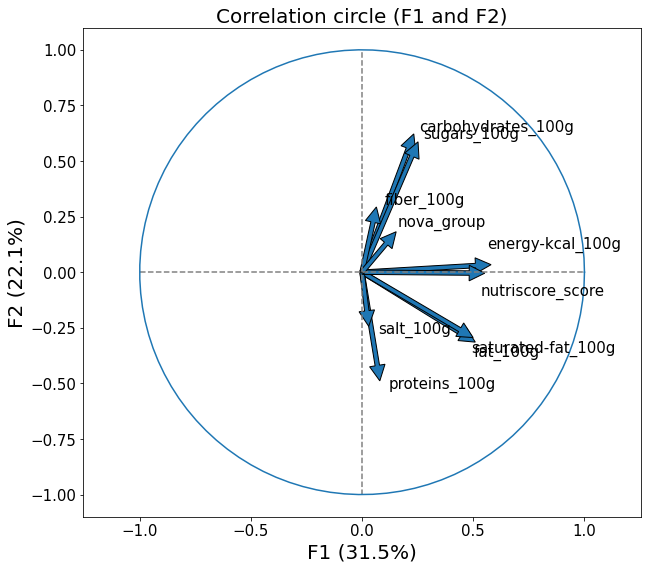

100%|█████████████████████████████████████████████████████████████████████████| 145053/145053 [05:38<00:00, 428.26it/s]


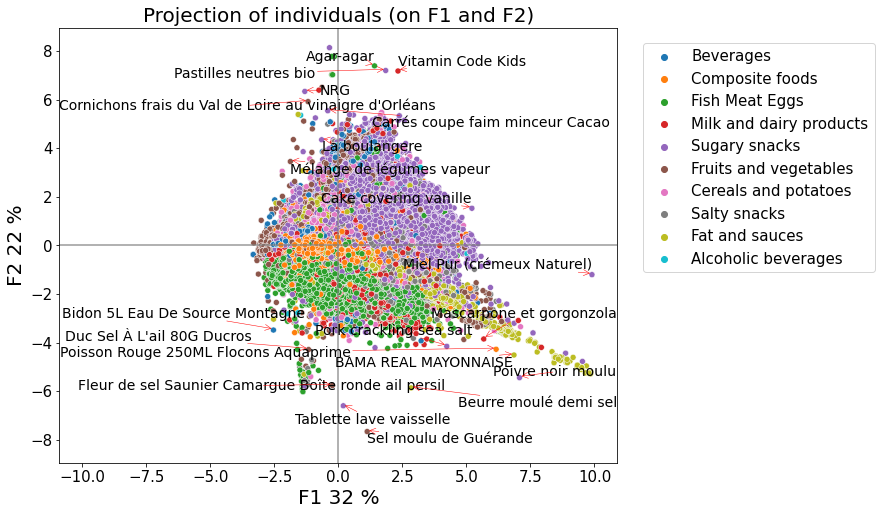

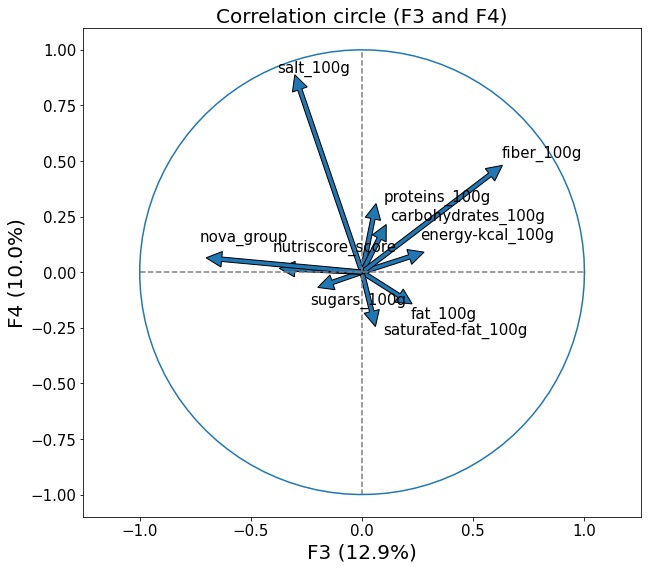

100%|█████████████████████████████████████████████████████████████████████████| 145053/145053 [04:52<00:00, 495.57it/s]


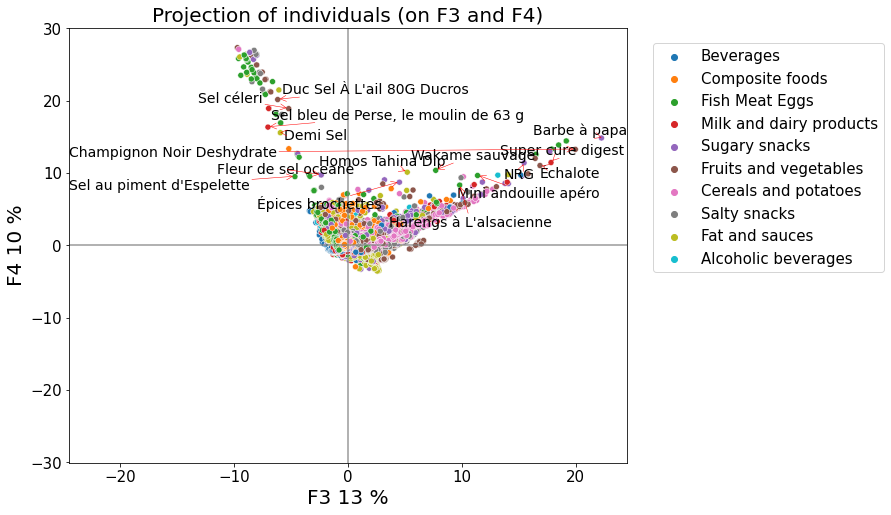


      Based on both our heatmap, the correlation circle and the projection,
      
       - F1 seems to represent how rich a product is with its fatness and energy.
      The more a product is rich, the more its nutriscore increase. 
      In other words, the most fat and energy means the worst nutriscore.
      
       - F2 opposes carbs and sugar to proteins. As seen in the pairplot, the
      more carbs the less proteins. Moreover, carbs and sugar are going
      along very well.
      
       - F3 seems to oppose fibers and nova. Meaning that the most fibers they are
      in the product, the less transformed it is.
       
       - F4 seems to only represent the amount of salt in a product.
      


In [33]:
# Start with F1F2

# Define components (Starting with 0):
x_y = [0,1]

# Draw correlation graph
correlation_graph(pca, x_y, features)

# Compute coordinates of our individuals in their new space
df_pca_proj = pca.transform(df_pca_scaled)

# Draw factorial planes
display_factorial_planes(df_pca_proj, x_y, labels = names, pca=pca, 
                         clusters = df.pnns_groups_1, threshold = 0.4)


# Continue with F3F4

# Define components (Starting with 0):
x_y = [2,3]

# Draw correlation graph
correlation_graph(pca, x_y, features)

# Compute coordinates of our individuals in their new space
df_pca_proj = pca.transform(df_pca_scaled, )

# Draw factorial planes
display_factorial_planes(df_pca_proj, x_y, labels = names, pca=pca, 
                         clusters = df.pnns_groups_1, threshold = 1)


print("""
      Based on both our heatmap, the correlation circle and the projection,
      
       - F1 seems to represent how rich a product is with its fatness and energy.
      The more a product is rich, the more its nutriscore increase. 
      In other words, the most fat and energy means the worst nutriscore.
      
       - F2 opposes carbs and sugar to proteins. As seen in the pairplot, the
      more carbs the less proteins. Moreover, carbs and sugar are going
      along very well.
      
       - F3 seems to oppose fibers and nova. Meaning that the most fibers they are
      in the product, the less transformed it is.
       
       - F4 seems to only represent the amount of salt in a product.
      """)